In [1]:
import matplotlib.pyplot as plt
import numpy
import numpy as np
from Dataset import load_scg, load_scg_template

In [2]:
signals_train, labels_train, duration, fs =  load_scg_template(0.1, 'train')
signals_test, labels_test, duration, fs =  load_scg_template(0.1, 'test')

In [12]:
S_train, S_test = [], []

def check_S(S):
    label = -1
    if 90 <= S < 105:
        label = 0
    elif 105 <= S < 135:
        label = 1
    elif 135 <= S < 165:
        label = 2
    elif S >= 165:
        label = 3
    return label

for label in labels_train:
    S_train.append(check_S(label[-2]))

for label in labels_test:
    S_test.append(check_S(label[-2]))

longest_template = -1

for signal in signals_train:
    if len(signal) > longest_template:
        longest_template = len(signal)
        idx_signal = signal
for signal in signals_test:
    if len(signal) > longest_template:
        longest_template = len(signal)
longest_template

padded_signals_train = []
padded_signals_test = []

for signal in signals_train:
    padded_signal = np.pad(signal, (0, longest_template-len(signal)), 'constant', constant_values=0)
    padded_signals_train.append(padded_signal)

for signal in signals_test:
    padded_signal = np.pad(signal, (0, longest_template-len(signal)), 'constant', constant_values=0)
    padded_signals_test.append(padded_signal)

padded_signals_train_np = np.array(padded_signals_train)
padded_signals_test_np = np.array(padded_signals_test)
S_train_np = np.array(S_train)
S_test_np = np.array(S_test)
padded_signals_train_np.shape

(5000, 120)

In [18]:
X = padded_signals_train_np
y = S_train_np
X_test = padded_signals_test_np
y_test =S_test_np

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, y)
y_pred = neigh.predict(X_test)
print(y_pred)
score_ = neigh.score(X_test, y_test)
print(score_)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


[2 1 2 ... 2 2 2]
0.7216666666666667


array([[242,  63,  76,  90],
       [ 39, 609, 166, 167],
       [ 15,  52, 871,  81],
       [  4,  33,  49, 443]], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
X = padded_signals_train_np
y = S_train_np
X_test = padded_signals_test_np
y_test =S_test_np
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
clf.fit(X, y)
clf = clf.fit(X, y)
y_pred = clf.predict(X_test)

score_ = clf.score(X_test, y_test)
print(score_)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

0.353


array([[  9,  56, 398,   8],
       [  0, 102, 856,  23],
       [  1,  78, 907,  33],
       [  0,  39, 449,  41]], dtype=int64)

In [28]:
from sklearn import svm
X = padded_signals_train_np
y = S_train_np
X_test = padded_signals_test_np
y_test =S_test_np
clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X_test)

score_ = clf.score(X_test, y_test)
print(score_)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

0.33866666666666667


array([[   0,    0,  471,    0],
       [   0,    1,  977,    3],
       [   0,    0, 1011,    8],
       [   0,    0,  525,    4]], dtype=int64)

In [ ]:

from tslearn.svm import TimeSeriesSVC

X = padded_signals_train_np
y = S_train_np
X_test = padded_signals_test_np
y_test =S_test_np
clf = TimeSeriesSVC(kernel="gak", gamma="auto", probability=True)
clf.fit(X, y)

y_pred = clf.predict(X_test)

score_ = clf.score(X_test, y_test)
print(score_)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


In [5]:
# kNN
# Support Vector Machine (SVM)
# Decision trees
# Random forest
# Time-series specific Support Vector Classifier

In [19]:
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# np.random.seed(0)
# n_samples = 2000
# time = np.linspace(0, 8, n_samples)
#
# s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
# s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
# s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
#
# S = np.c_[s1, s2, s3]
# S += 0.2 * np.random.normal(size=S.shape)  # Add noise
#
# S /= S.std(axis=0)  # Standardize data
# # Mix data
# A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
# X = np.dot(S, A.T)  # Generate observations
# print(X.shape)
X = signals_clean[5:6].T
print(X.shape)
#
# # Compute ICA
# ica = FastICA(n_components=3)
# S_ = ica.fit_transform(X)  # Reconstruct signals
# A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
# assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
#
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components


# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

plt.figure(figsize=(16,8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

(1000, 1)


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51678 sha256=350e58666be2bfccd0e635993a2502d80dbe0c1d82a2e8dd2e962c24d6f8b974
  Stored in directory: c:\users\86189\appdata\local\pip\cache\wheels\8a\89\44\d82169c9a1caecb223315bcb714dc329497f7f10a4761560eb
Successfully built padasip


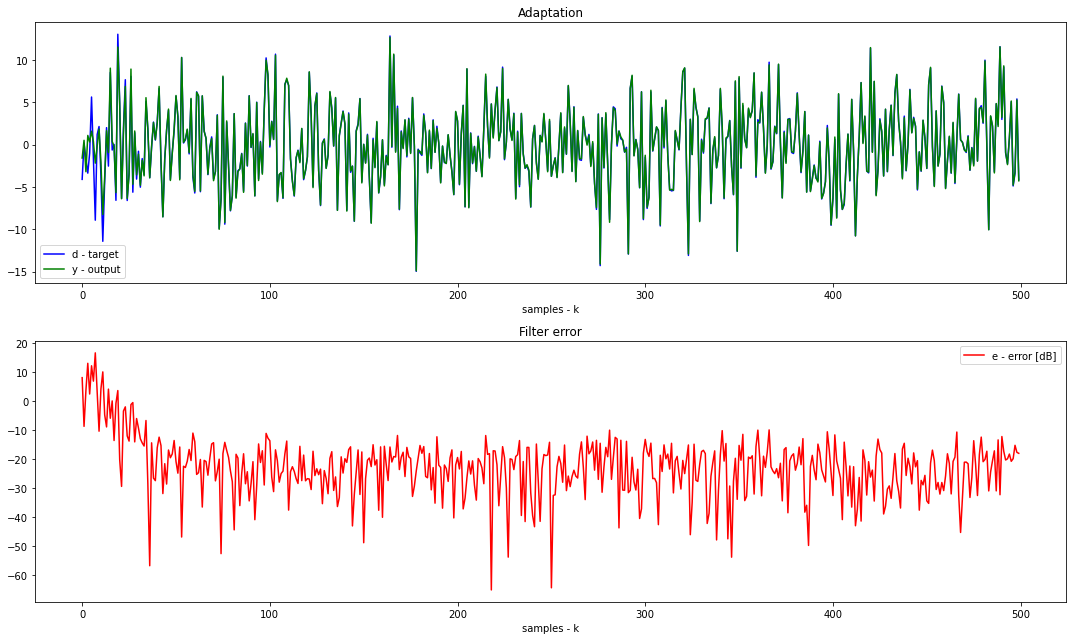

In [21]:
import numpy as np
import matplotlib.pylab as plt
!pip install padasip
import padasip as pa

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

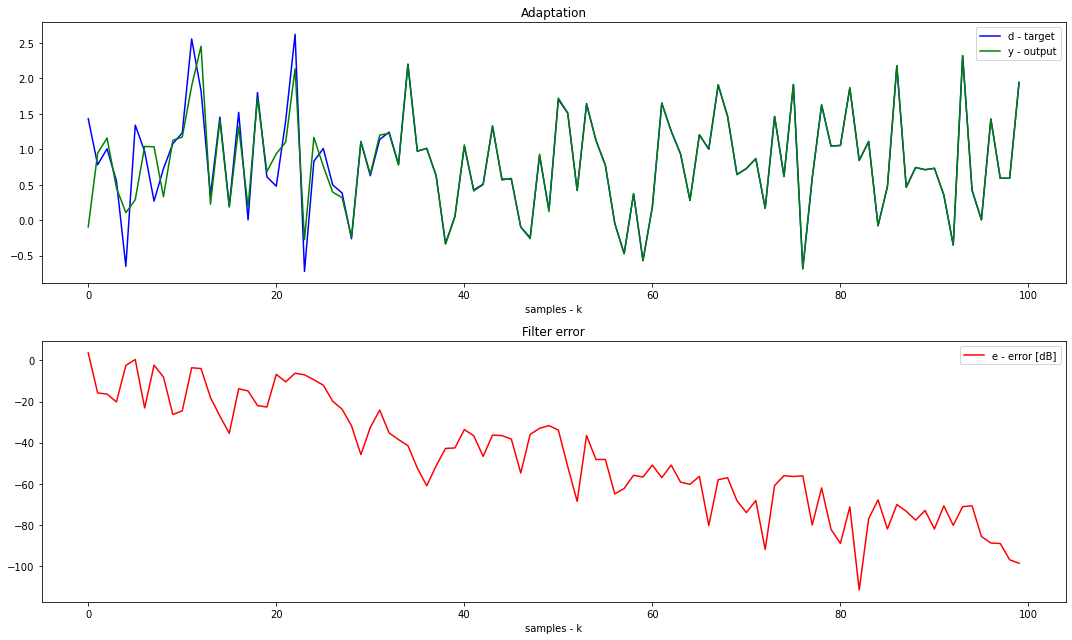

In [22]:
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x

def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d

N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterLMS(3, mu=1.)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y

### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()